# Simple CNN model for CIFAR-10 and CIFAR100

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, utils, datasets, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Other imports
from tqdm import tqdm

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [3]:
# Set device: either Cuda (GPU), MPS (Apple Silicon GPU), or CPU
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [4]:
# load the data
dataset = 'CIFAR10'
batch_size = 64

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
train_dataset = datasets.CIFAR10(f'data/{dataset}_data/', download=True, train=True, transform=transform)
test_val_dataset = datasets.CIFAR10(f'data/{dataset}_data/', download=True, train=False, transform=transform)

# Split the test_val_set into a validation set and a test set
val_dataset, test_dataset = train_test_split(test_val_dataset, test_size=0.5, random_state=42)

# Define the dataloaders
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Define a simple Convolutional Neural Network class using pytorch

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Define three convolutional layers with batch normalization and max pooling
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.batch_norm3 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)

        # Define two fully connected layers with dropout
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(512, 10)


    def forward(self, x):
        # Add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
        x = self.pool(F.relu(self.batch_norm3(self.conv3(x))))

        # Flatten image input
        x = x.view(-1, 64 * 4 * 4)

        # Add dropout layer
        x = self.dropout(x)

        # Add first hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # Add dropout layer
        x = self.dropout(x)

        # Add second hidden layer, with relu activation function
        x = self.fc2(x)

        return x

In [6]:
# Initialize the model and print the model architecture
model = SimpleCNN()
# move the model to the device
model.to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [7]:
# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# define the number of epochs
epochs = 10

# initialize the lists to store the training and validation losses
train_losses = []
val_losses = []

# initialize the lists to store the training and validation accuracies
train_accuracies = []
val_accuracies = []

# initialize the best validation loss
best_val_loss = np.Inf

  0%|          | 0/782 [00:00<?, ?it/s]

100%|██████████| 79/79 [00:00<00:00, 238.24it/s]


Epoch: 1/10 | Train loss: 1.3011 | Val loss: 1.0704 | Train acc: 0.5269 | Val acc: 0.6130


100%|██████████| 79/79 [00:00<00:00, 299.45it/s]


Epoch: 2/10 | Train loss: 0.9931 | Val loss: 0.9023 | Train acc: 0.6488 | Val acc: 0.6784


100%|██████████| 79/79 [00:00<00:00, 305.35it/s]


Epoch: 3/10 | Train loss: 0.8744 | Val loss: 0.8038 | Train acc: 0.6918 | Val acc: 0.7246


100%|██████████| 79/79 [00:00<00:00, 302.12it/s]


Epoch: 4/10 | Train loss: 0.7979 | Val loss: 0.7555 | Train acc: 0.7174 | Val acc: 0.7344


100%|██████████| 79/79 [00:00<00:00, 301.38it/s]


Epoch: 5/10 | Train loss: 0.7452 | Val loss: 0.7792 | Train acc: 0.7373 | Val acc: 0.7208


100%|██████████| 79/79 [00:00<00:00, 303.79it/s]


Epoch: 6/10 | Train loss: 0.6972 | Val loss: 0.7174 | Train acc: 0.7540 | Val acc: 0.7504


100%|██████████| 79/79 [00:00<00:00, 304.23it/s]


Epoch: 7/10 | Train loss: 0.6570 | Val loss: 0.6766 | Train acc: 0.7661 | Val acc: 0.7626


100%|██████████| 79/79 [00:00<00:00, 300.07it/s]


Epoch: 8/10 | Train loss: 0.6218 | Val loss: 0.6862 | Train acc: 0.7806 | Val acc: 0.7620


100%|██████████| 79/79 [00:00<00:00, 302.38it/s]


Epoch: 9/10 | Train loss: 0.5870 | Val loss: 0.7067 | Train acc: 0.7932 | Val acc: 0.7560


100%|██████████| 79/79 [00:00<00:00, 292.83it/s]


Epoch: 10/10 | Train loss: 0.5540 | Val loss: 0.6870 | Train acc: 0.8055 | Val acc: 0.7656


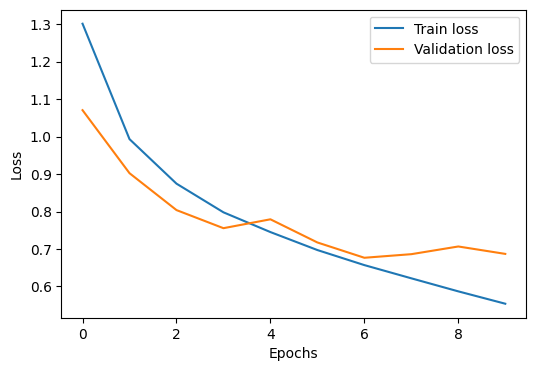

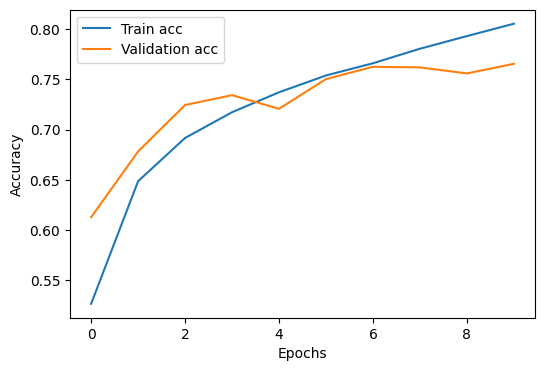

In [9]:
# train the model

history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(epochs):
    # set the model to train mode
    model.train()

    # initialize the running training loss and accuracy
    running_train_loss = 0.0
    running_train_acc = 0.0

    # iterate over the training data loader
    for inputs, labels in tqdm(trainloader):
        # move the inputs and labels to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero out the gradients
        optimizer.zero_grad()

        # forward pass
        outputs = model(inputs)

        # calculate the loss
        loss = criterion(outputs, labels)

        # backward pass
        loss.backward()

        # update the parameters
        optimizer.step()

        # calculate the training loss
        running_train_loss += loss.item() * inputs.size(0)

        # calculate the training accuracy
        _, preds = torch.max(outputs, 1)
        running_train_acc += torch.sum(preds == labels.data)

    # calculate the average training loss and accuracy
    epoch_train_loss = running_train_loss / len(trainloader.dataset)
    epoch_train_acc = running_train_acc / len(trainloader.dataset)

    # append the training loss and accuracy
    history['train_loss'].append(epoch_train_loss)
    history['train_acc'].append(epoch_train_acc)

    # set the model to evaluation mode
    model.eval()

    # initialize the running validation loss and accuracy
    running_val_loss = 0.0
    running_val_acc = 0.0

    # iterate over the validation data loader
    for inputs, labels in tqdm(valloader):
        # move the inputs and labels to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(inputs)

        # calculate the loss
        loss = criterion(outputs, labels)

        # calculate the validation loss
        running_val_loss += loss.item() * inputs.size(0)

        # calculate the validation accuracy
        _, preds = torch.max(outputs, 1)
        running_val_acc += torch.sum(preds == labels.data)

    # calculate the average validation loss and accuracy
    epoch_val_loss = running_val_loss / len(valloader.dataset)
    epoch_val_acc = running_val_acc / len(valloader.dataset)

    # append the validation loss and accuracy
    history['val_loss'].append(epoch_val_loss)
    history['val_acc'].append(epoch_val_acc)

    # print the training and validation loss and accuracy
    print(
        f'Epoch: {epoch+1}/{epochs} | '
        f'Train loss: {epoch_train_loss:.4f} | Val loss: {epoch_val_loss:.4f} | '
        f'Train acc: {epoch_train_acc:.4f} | Val acc: {epoch_val_acc:.4f}'
    )

    # save the model if the validation loss is less than the best validation loss
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(model.state_dict(), f'best_model_{dataset}.pt')

# plot the training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(history['train_loss'], label='Train loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.figure(figsize=(6, 4))
# move the lists to the cpu
history['train_acc'] = [t.cpu() for t in history['train_acc']]
history['val_acc'] = [t.cpu() for t in history['val_acc']]
plt.plot(history['train_acc'], label='Train acc')
plt.plot(history['val_acc'], label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
# Test the model on the test set

# load the best model
model.load_state_dict(torch.load(f'best_model_{dataset}.pt'))

# set the model to evaluation mode
model.eval()

# initialize the running test loss and accuracy
running_test_loss = 0.0
running_test_acc = 0.0

# iterate over the test data loader

for inputs, labels in tqdm(testloader):
    # move the inputs and labels to the device
    inputs = inputs.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(inputs)

    # calculate the loss
    loss = criterion(outputs, labels)

    # calculate the test loss
    running_test_loss += loss.item() * inputs.size(0)

    # calculate the test accuracy
    _, preds = torch.max(outputs, 1)
    running_test_acc += torch.sum(preds == labels.data)

# calculate the average test loss and accuracy
epoch_test_loss = running_test_loss / len(testloader.dataset)
epoch_test_acc = running_test_acc / len(testloader.dataset)

# print the test loss and accuracy
print(
    f'Test loss: {epoch_test_loss:.4f} | '
    f'Test acc: {epoch_test_acc:.4f}'
)

# print the classification report
print(classification_report(labels.data.cpu().numpy(), preds.cpu().numpy()))

# print the confusion matrix
print(confusion_matrix(labels.data.cpu().numpy(), preds.cpu().numpy()))

# print the total accuracy
print(f'Total accuracy: {np.sum(preds.cpu().numpy() == labels.data.cpu().numpy()) / len(labels.data.cpu().numpy())}')


100%|██████████| 79/79 [00:00<00:00, 287.44it/s]

Test loss: 0.6616 | Test acc: 0.7682
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      0.67      0.80         3

    accuracy                           0.62         8
   macro avg       0.57      0.45      0.50         8
weighted avg       0.88      0.62      0.72         8

[[1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 1 0 0 0 2]]
Total accuracy: 0.625



/Users/prestongovender/miniforge3/envs/pytorch-vit-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prestongovender/miniforge3/envs/pytorch-vit-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prestongovender/miniforge3/envs/pytorch-vit-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

```
100%|██████████| 79/79 [00:00<00:00, 287.44it/s]
Test loss: 0.6616 | Test acc: 0.7682

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       1.00      0.67      0.80         3

    accuracy                           0.62         8
   macro avg       0.57      0.45      0.50         8
weighted avg       0.88      0.62      0.72         8

[[1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 1 0 0 0 2]]
Total accuracy: 0.625
